**Importing the Libraries**

In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install keras.models

  Using cached https://files.pythonhosted.org/packages/25/b9/b97f7202081346923af692be7c926faf7b10c4ed432f99dca416786fec1e/keras_models-0.0.7-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import math as m
from sklearn.preprocessing import MinMaxScaler as mms
import numpy as np
import pandas_datareader as web
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime
plt.style.use('fivethirtyeight')

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

**Input the name of the NASDAQ name of the Company to predict the Stock Price**

In [4]:
name = input()
today = datetime.date.today()
yesterday = today - datetime.timedelta(days = 1)
d_yesterday = today - datetime.timedelta(days = 2)
print("Yesterday's date : ", yesterday)
print("Day before Yesterday : ", d_yesterday)
d_yesterday = str(d_yesterday)
yesterday = str(yesterday)

ADBE


NameError: name 'datetime' is not defined

**Creating the Data Frame using Yahoo as the Data Source**

In [ ]:
df = web.DataReader(name, data_source = 'yahoo', start='2010-01-01', end = d_yesterday)
df

In [69]:
df.shape

(2722, 6)

**Visualizing the Closing Price of Stocks**

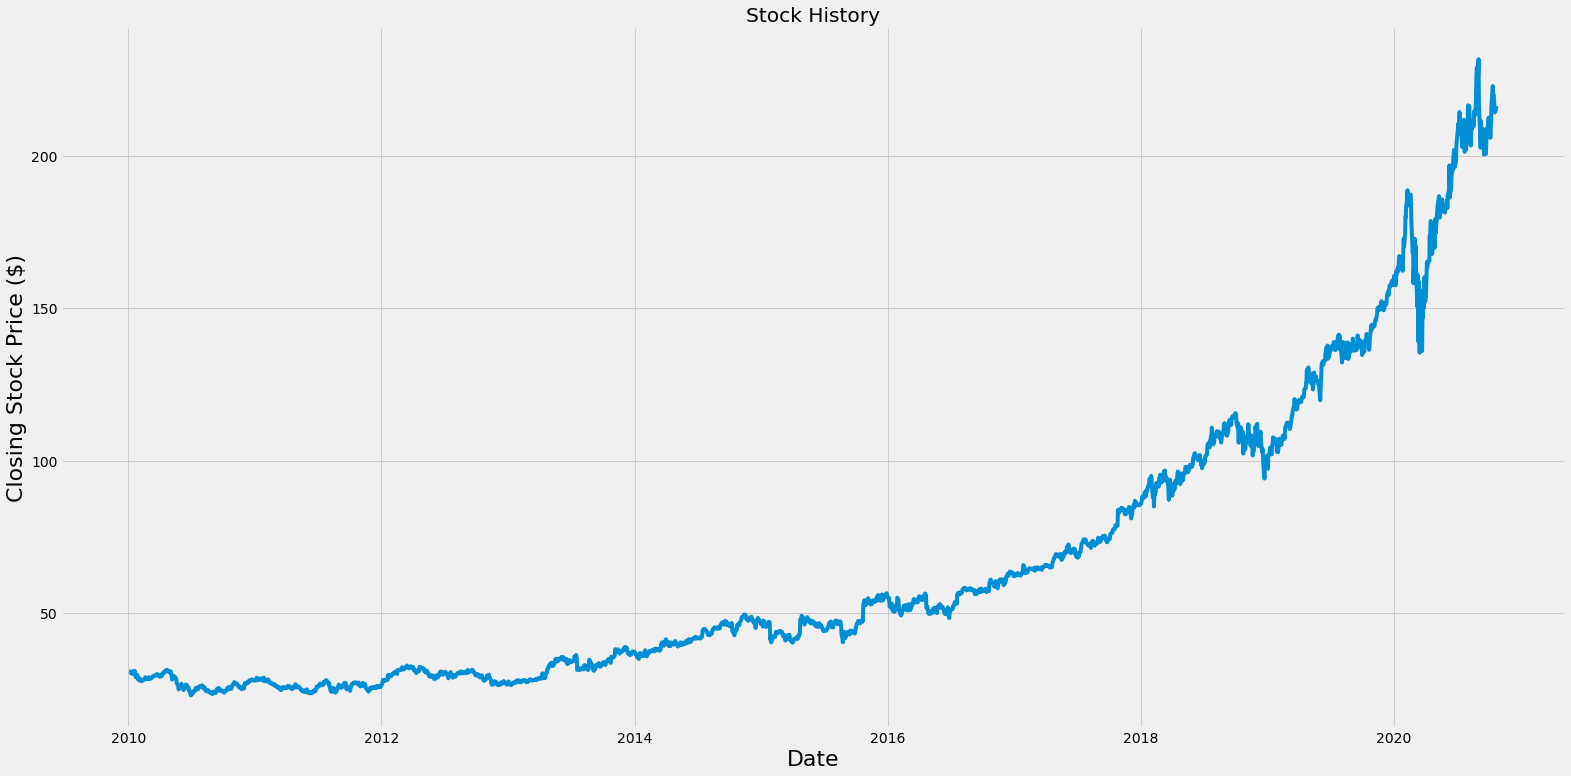

In [70]:
plt.figure(figsize = (24,12))
plt.title('Stock History')
plt.xlabel('Date', fontsize = 22)
plt.ylabel('Closing Stock Price ($)', fontsize = 22)
plt.plot(df['Close'])
plt.show()

**Training the model with 80% of the Data**

In [71]:
data = df.filter(['Close'])
ds = data.values
training = m.ceil(len(ds)*0.8)
training

2178

**Scaling of Data**

In [72]:
sc = mms(feature_range=(0,1))
sd = sc.fit_transform(ds)
sd

array([[0.03805599],
       [0.03810391],
       [0.03719325],
       ...,
       [0.91923892],
       [0.91967027],
       [0.9260928 ]])

1.   Creating **Training** Dataset
2.   Creating **Scaled Training** Dataset
3.   **Spliting** the Dataset into **Two** Datasets



In [73]:
td = sd[0:training, :]
x_train = []
y_train = []
for i in range(60,len(td)):
  x_train.append(td[i-60 : i, 0])
  y_train.append(td[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.03805599, 0.03810391, 0.03719325, 0.03565951, 0.03666603,
       0.03479678, 0.03383819, 0.03518022, 0.03810391, 0.03762462,
       0.03877493, 0.03633052, 0.03355061, 0.02851802, 0.03024348,
       0.03110621, 0.03192101, 0.02947661, 0.02477953, 0.0258819 ,
       0.02612154, 0.02693635, 0.02314992, 0.02401266, 0.02257477,
       0.02396472, 0.02386886, 0.02449195, 0.02358129, 0.02559433,
       0.02674463, 0.02856595, 0.02760736, 0.02741564, 0.02549847,
       0.02693635, 0.02679256, 0.02712807, 0.0288056 , 0.02612154,
       0.02612154, 0.02693635, 0.02674463, 0.02693635, 0.02775115,
       0.02856595, 0.02957247, 0.03000384, 0.0300997 , 0.03048313,
       0.03172929, 0.03163344, 0.03153758, 0.03158551, 0.03292753,
       0.03182515, 0.03355061, 0.03187308, 0.03153758, 0.03240031])]
[0.030099697456138608]



**Converting x_train and y_train to numpy array**

In [74]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2118, 60, 1)

**LSTM Model**

In [75]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [76]:
model.compile(optimizer = 'adam' , loss = 'mean_squared_error')

In [77]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2118/2118 [==============================] - 52s 25ms/step - loss: 1.8170e-04


1.   **Creating testing Dataset**
2.   **Creating a new array containing scaled values from index 1695 to 2193**



In [78]:
td = sd[training - 60 : , :]
x_test = []
y_test = ds[training : , :]
for i in range (60, len(td)):
  x_test.append(td[i - 60 : i, 0])

**Converting the test data to numpy array**

In [79]:
x_test = np.array(x_test)

In [80]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [81]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)
if predictions.all() == y_test.all():
  print('Yes')

Yes


Thus predictions are exactly similar to y_test

**Root Mean Square Error**

In [82]:
rms = np.sqrt(np.mean(predictions - y_test) ** 2)
rms

1.2659759521484375

**Plotting the data**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


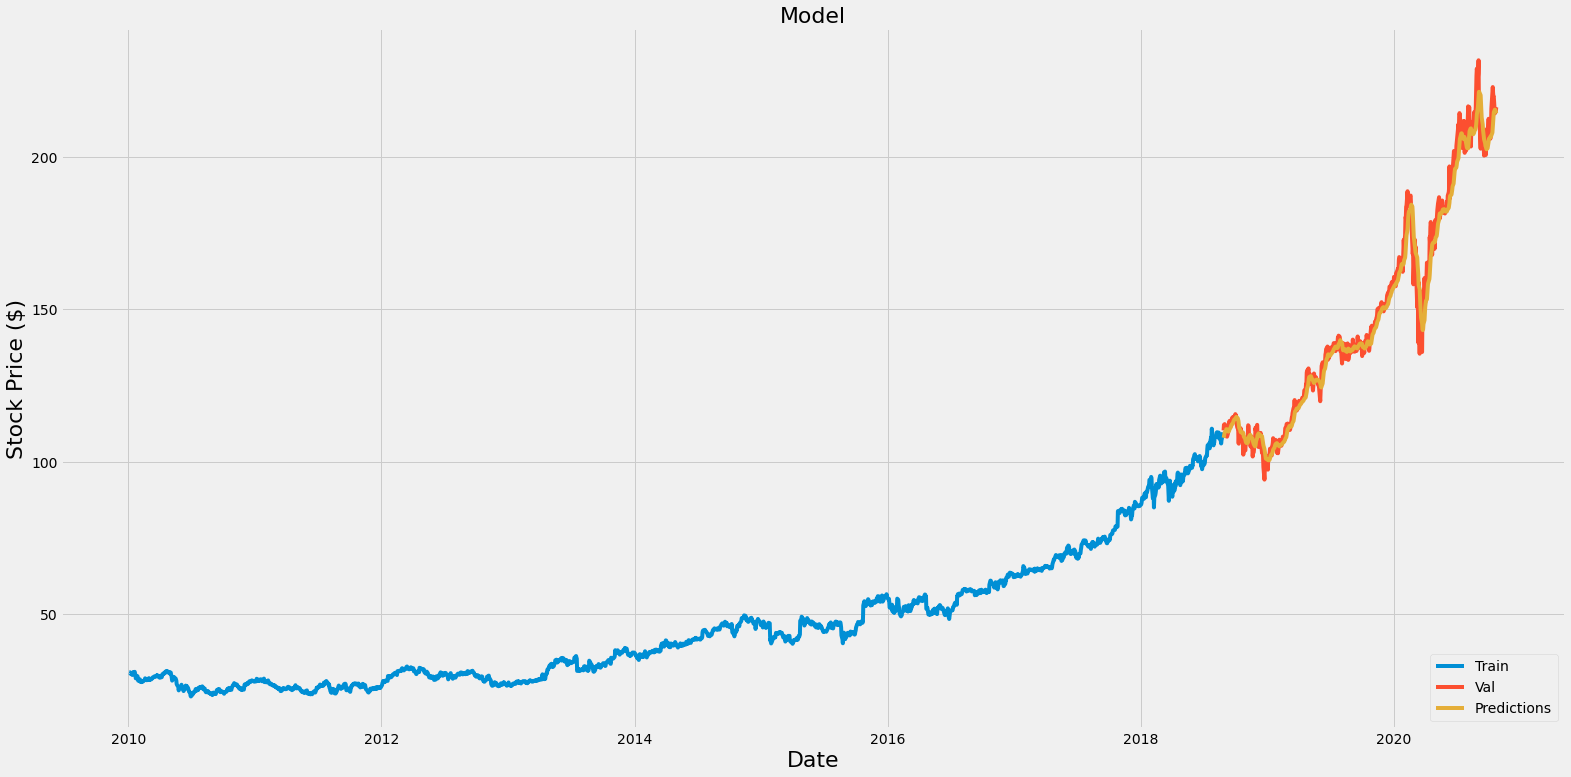

In [83]:
train = data[ : training] 
valid = data[training : ]
valid['Predictions'] = predictions
plt.figure(figsize = (24,12))
plt.title('Model',fontsize = 22)
plt.xlabel('Date',fontsize = 22)
plt.ylabel('Stock Price ($)',fontsize = 22)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [84]:
valid

,Close,Predictions
Date,,
2018-08-28,110.260002,107.840942
2018-08-29,112.019997,108.263489
2018-08-30,111.949997,108.906502
2018-08-31,112.330002,109.566536
2018-09-04,111.709999,110.202904
...,...,...
2020-10-19,214.220001,215.453186
2020-10-20,214.649994,215.418411
2020-10-21,214.800003,215.064911


In [92]:
name_quote = web.DataReader('name','yahoo', start='1980-01-01', end = d_yesterday)
new_df = name_quote.filter(['Close'])
last_60 = new_df[-60:].values
last_60_scaled = sc.transform(last_60)
X_test = []
X_test.append((last_60_scaled))
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predict_price = model.predict(X_test)
predict_price = sc.inverse_transform(predict_price)
print("Predicted Price = ",predict_price)

Predicted Price =  [[4.1142464]]


In [93]:
name_quote = web.DataReader(name, 'yahoo', start = d_yesterday, end = yesterday)
print(name_quote['Close'])

Date
2020-10-23    216.229996
Name: Close, dtype: float64
